In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('JHipster-gp.csv') 
NB_CONFIGURATIONS_JH = len(df)

In [3]:
len(df.query("Build == 'KO' | Compile == 'KO'")) / NB_CONFIGURATIONS_JH

0.3570993296770262

In [4]:
df.head()

,JHipsterRegister,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,...,enableSocialSignIn,useSass,enableTranslation,testFrameworks,Generate,Log-Generate,Compile,Log-Compile,Build,Log-Build
0,jhipster1,True,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""",...,false,false,False,"[""cucumber"",""protractor"",""gatling""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,KO,Exception encountered during context initializ...
1,jhipster1,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""",...,false,false,False,"[""cucumber"",""protractor"",""gatling""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,KO,Exception encountered during context initializ...
2,jhipster2,True,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""",...,false,false,True,"[""gatling"",""cucumber"",""protractor""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,OK,ND
3,jhipster2,False,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""",...,false,false,True,"[""gatling"",""cucumber"",""protractor""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,OK,ND
4,jhipster3,True,"""monolith""","""jwt""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mysql""",...,false,true,True,"[""cucumber"",""gatling"",""protractor""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,OK,ND


In [5]:
df['Build'].unique(), df['Compile'].unique()

(array(['KO', 'OK'], dtype=object), array(['OK', 'KO'], dtype=object))

In [6]:
df['searchEngine'].unique()

array(['"elasticsearch"', '"no"'], dtype=object)

In [7]:
df['applicationType'].unique(), df['databaseType'].unique(), df['prodDatabaseType'].unique()

(array(['"monolith"', '"gateway"', '"microservice"', '"uaa"'], dtype=object),
 array(['"sql"', '"mongodb"', '"cassandra"', '"no"'], dtype=object),
 array(['"mariadb"', '"mongodb"', '"mysql"', '"postgresql"', '"cassandra"',
        '"no"'], dtype=object))

In [50]:
# MAGR
mariadb_cfgbug = {
    'prodDatabaseType' : '"mariadb"', 
    'buildTool' : '"gradle"',
    'Build' : 'KO'
}

# mariadb2_cfgbug = {
#    'devDatabaseType' : '"mariadb"', 
#    'buildTool' : '"gradle"',
#    'Build' : 'KO'
# }

moso_cfgbug = {
    'prodDatabaseType' : '"mongodb"', 
    'enableSocialSignIn' : 'true',
   # 'Compile' : 'KO'
}


#uaa_cfgbug = {
#    "Docker" : True,
#    "authenticationType" : '"uaa"',
#    'applicationType': '"microservice"',
#    'Build' : 'KO'
# }

# uaa2_cfgbug = {
#   "Docker" : False,
#    "authenticationType" : '"uaa"',
#    'applicationType': '"microservice"',
#    'Build' : 'KO'
# }

# UADO 
uaagateway_cfgbug = {
    "Docker" : True,
    "authenticationType" : '"uaa"',
    'applicationType': '"gateway"',
    'Build' : 'KO'
}

# uaagateway2_cfgbug = {
#    "Docker" : False,
#    "authenticationType" : '"uaa"',
#    'applicationType': '"gateway"',
#    'Build' : 'KO'
# }

# supposed to be OASQL 
hibernate_cfgbug = {
    "hibernateCache" : '"no"',
    "authenticationType" : '"uaa"',
   # "Docker" : False,
    'Build' : 'KO'
}

uaaeh_cfgbug = {
    "hibernateCache" : '"ehcache"',
    "authenticationType" : '"uaa"',
    # two additional conditions, not documented in the table
    "Docker" : True,
    'applicationType': '"gateway"',
    'Build' : 'KO'
}

mado_cfgbug = {
    'prodDatabaseType' : '"mariadb"', 
    'applicationType' : '"monolith"', 
    'searchEngine' : '"no"', 
    "Docker" : True, 
    'Build' : 'KO'
}

# https://github.com/jhipster/generator-jhipster/issues/4009
# to refine
# OAuth2 authentication with SQL database This defect is faced 649 times, when trying
# to deploy a web-app, using an SQL database ( MySQL , PostgreSQL or MariaDB ) and an
# OAuth2 authentication, with Docker . It was reported on August 20th, 2016 but the JHipster
# team was unable to reproduce it on their end.
oauth2_cfgbug = {
    "authenticationType" : '"oauth2"', 
    "Docker" : True, 
    "databaseType": '"sql"',
    'Build' : 'KO'
}

# oauth2_cfgbug, 
# uaa_cfgbug, uaa2_cfgbug, 
# mariadb2_cfgbug, 
# uaagateway2_cfgbug, 
jh_major_bugs = [oauth2_cfgbug, mariadb_cfgbug,  moso_cfgbug, uaagateway_cfgbug, hibernate_cfgbug, uaaeh_cfgbug, mado_cfgbug]


def filter_with_configbugs(cf_values, cdata):
    dff = cdata
    for col, val in cf_values.items():
        dff = dff[dff[col] == val]
    return dff



assert(round((len(filter_with_configbugs(mariadb_cfgbug, df)) / NB_CONFIGURATIONS_JH) * 100, 2) == 16.18) 
assert(round((len(filter_with_configbugs(moso_cfgbug, df))  / NB_CONFIGURATIONS_JH) * 100, 2) == 0.49) 

# UADO in the table
assert(round((len(filter_with_configbugs(uaagateway_cfgbug, df)) / NB_CONFIGURATIONS_JH) * 100, 2) == 6.83) 

# print(round((len(filter_with_configbugs(uaa_cfgbug, df)) / NB_CONFIGURATIONS_JH) * 100, 2)) 
# print(round((len(filter_with_configbugs(uaa2_cfgbug, df)) / NB_CONFIGURATIONS_JH) * 100, 2)) 

print("supposed to be OASQL in the table... but support differs (should be 2.438)", round((len(filter_with_configbugs(hibernate_cfgbug, df)) / NB_CONFIGURATIONS_JH) * 100, 2)) #  == 2.44
print("supposed to be UAAEH in the table... but support differs (should be 2.194)", round((len(filter_with_configbugs(uaaeh_cfgbug, df))  / NB_CONFIGURATIONS_JH) * 100, 2)) 
print("MADO (5.59 in reality)", round((len(filter_with_configbugs(mado_cfgbug, df))  / NB_CONFIGURATIONS_JH) * 100, 2)) # should be 5.59

# not documented in the table, but in the... text! (OAUTH2+SQL)
print("OAUTH2+SQL (as documented in the text, not in the table)", round((len(filter_with_configbugs(oauth2_cfgbug, df))  / NB_CONFIGURATIONS_JH) * 100, 2)) 

# print(len(filter_with_configbugs(oauth2_cfgbug, df)))
# print(len(filter_with_configbugs(uaa2_cfgbug, df)))

# print(len(filter_with_configbugs(mariadb2_cfgbug, df)))

# 0.488+16.179+6.825+2.438+2.194+5.590

# filter_with_configbugs(mado_cfgbug, df)

# df[(df['prodDatabaseType'] == '"mariadb"') & (df['buildTool'] == '"gradle"')] 
# filter_with_configbugs(moso_cfgbug, df)

supposed to be OASQL in the table... but support differs (should be 2.438) 5.64
supposed to be UAAEH in the table... but support differs (should be 2.194) 2.19
MADO (5.59 in reality) 5.48
OAUTH2+SQL (as documented in the text, not in the table) 4.2


In [9]:
jh_major_bugs

[{'authenticationType': '"oauth2"',
  'Docker': True,
  'databaseType': '"sql"',
  'Build': 'KO'},
 {'prodDatabaseType': '"mariadb"', 'buildTool': '"gradle"', 'Build': 'KO'},
 {'devDatabaseType': '"mariadb"', 'buildTool': '"gradle"', 'Build': 'KO'},
 {'prodDatabaseType': '"mongodb"', 'enableSocialSignIn': 'true'},
 {'Docker': True,
  'authenticationType': '"uaa"',
  'applicationType': '"microservice"',
  'Build': 'KO'},
 {'Docker': False,
  'authenticationType': '"uaa"',
  'applicationType': '"microservice"',
  'Build': 'KO'},
 {'Docker': True,
  'authenticationType': '"uaa"',
  'applicationType': '"gateway"',
  'Build': 'KO'},
 {'Docker': False,
  'authenticationType': '"uaa"',
  'applicationType': '"gateway"',
  'Build': 'KO'},
 {'hibernateCache': '"no"', 'authenticationType': '"uaa"', 'Build': 'KO'},
 {'hibernateCache': '"ehcache"', 'authenticationType': '"uaa"', 'Build': 'KO'},
 {'prodDatabaseType': '"mariadb"',
  'applicationType': '"monolith"',
  'searchEngine': '"no"',
  'Docker

In [10]:
1440 / NB_CONFIGURATIONS_JH

0.054844606946983544

In [11]:
failure_patterns = {
    # cluster_based with manual 
    "MARIADB_GRADLE_LIQUIDBASE" : "Error creating bean with name 'liquibase' defined in class path resource [io/variability/jhipster/config/DatabaseConfiguration.class",
    "MARIADB_DOCKER" : 'Error parsing reference: "jhipster - jhipster-mariadb" is not a valid repository', # 1433 (Mariadb + Docker)
    # certainly same as here: "UAA_DOCKER": "No instances available for uaa",
    "UAA" : "Error creating bean with name 'jwtAccessTokenConverter' defined in class path resource [io/variability/jhipster/config/MicroserviceSecurityConfiguration.class", # 3311 (most probably issues with UAA)
    "OAUTH2" : " Error creating bean with name 'userService': Unsatisfied dependency expressed through field 'jdbcTokenStore': No qualifying bean of type [org.springframework.security.oauth2.provider.token.store.JdbcTokenStore]", # most probably: https://github.com/jhipster/generator-jhipster/issues/4009 
    "NETWORK_ISSUE" : "Failed to initialize pool: Could not connect to address=", 
    # manual curation
    # "MARIADB_GRADLE_4222" : 'jdbc:mariadb',
    # "MARIADB_GRADLE_4222_2" : 'jhipster-mariadb',    
    "COMPILATION_ERROR": "COMPILATION ERROR",
    "ND": "ND", 
    # "SOCIAL_USER_CONNECTION": "SocialUserConnection",
    # "JdbcTokenStore" : "No qualifying bean of type [org.springframework.security.oauth2.provider.token.store.JdbcTokenStore]"
}

NAN_FAILURE_PATTERN = "nan"

def check_pattern(log): 
    if (isinstance(log, float)):
        return NAN_FAILURE_PATTERN
    found_patterns = []
    found_pattern = None
    for name_pattern, message in failure_patterns.items():
        if (message in log): # pattern recognized          
            found_pattern = (name_pattern, message)
            found_patterns.append(found_pattern)
    return found_patterns



In [12]:
df.head()

,JHipsterRegister,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,...,enableSocialSignIn,useSass,enableTranslation,testFrameworks,Generate,Log-Generate,Compile,Log-Compile,Build,Log-Build
0,jhipster1,True,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""",...,false,false,False,"[""cucumber"",""protractor"",""gatling""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,KO,Exception encountered during context initializ...
1,jhipster1,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""",...,false,false,False,"[""cucumber"",""protractor"",""gatling""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,KO,Exception encountered during context initializ...
2,jhipster2,True,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""",...,false,false,True,"[""gatling"",""cucumber"",""protractor""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,OK,ND
3,jhipster2,False,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""",...,false,false,True,"[""gatling"",""cucumber"",""protractor""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,OK,ND
4,jhipster3,True,"""monolith""","""jwt""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mysql""",...,false,true,True,"[""cucumber"",""gatling"",""protractor""]",OK,Exception.java\n\nExceptionHandlingAsyncTaskEx...,OK,NaN,OK,ND


In [13]:
# MariaDB + Gradle = fails
df2 = filter_with_configbugs(mariadb_cfgbug, df) # df[(df.prodDatabaseType == '"mariadb"') & (df.buildTool == '"gradle"')] 
logs4222 = df2['Log-Build'] # https://github.com/jhipster/generator-jhipster/pull/4222
print(len(logs4222))
for log in logs4222:    
    found_patterns = check_pattern(log)
    if not found_patterns:
        print("no pattern recognized, it's another kind of failure...", log)
    elif not isinstance(found_patterns, list) and found_patterns is NAN_FAILURE_PATTERN:
        continue
    else:
        if (not failure_patterns["MARIADB_GRADLE_4222"] in [f[1] for f in found_patterns]) and (not failure_patterns["MARIADB_GRADLE_4222_2"] in [f[1] for f in found_patterns]):
            print("no MARIADB_GRADLE_4222", found_patterns)

4248


KeyError: 'MARIADB_GRADLE_4222'

In [14]:
df3 = filter_with_configbugs(uaa_cfgbug, df)
logsUAA = df3['Log-Build'] # UAA in beta 
masking = 0
print(len(logsUAA))
for log in logsUAA:
    found_patterns = check_pattern(log)
    if not found_patterns:
        print("no pattern recognized, it's another kind of failure...", log)
    elif not isinstance(found_patterns, list) and found_patterns is NAN_FAILURE_PATTERN:
        continue
    else:
        if (not failure_patterns["UAA_DOCKER"] in [f[1] for f in found_patterns]):
            masking = masking + 1
            print("no UAA!", found_patterns)
masking

228


KeyError: 'UAA_DOCKER'

In [23]:
def is_cfgbug_present(jh_bug, cf):   
    for col, val in jh_bug.items():
        if (not cf[col] == val):
            return False
    return True

df_bugs = pd.DataFrame(columns=["cfg", "bugs", "nb_bugs", "failures", "nb_failures"])
for i, cf in df.iterrows():
    bugs_found = [] 
    for jh_bug in jh_major_bugs:
        if (is_cfgbug_present(jh_bug, cf)):
            bugs_found.append(jh_bug)       
        else:
            continue
    if (len(bugs_found) == 0) and (cf['Build'] == 'KO' or cf['Compile'] == 'KO'):
        bugs_found.append("NON_MAJOR_BUG") # strange but real case (for ~200)
        
    failures_found = check_pattern(cf['Log-Build'])
    df_bugs = df_bugs.append({'cfg' : i, 'bugs' : bugs_found, "nb_bugs" : len(bugs_found), "failures" : failures_found, "nb_failures": len(failures_found)}, ignore_index=True)
        

            
        


In [24]:
df.loc[26237]

JHipsterRegister                                            jhipster13119
Docker                                                              False
applicationType                                                 "gateway"
authenticationType                                                  "uaa"
hibernateCache                                                "hazelcast"
clusteredHttpSession                                          "hazelcast"
websocket                                                            "no"
databaseType                                                        "sql"
devDatabaseType                                               "DiskBased"
prodDatabaseType                                             "postgresql"
buildTool                                                        "gradle"
searchEngine                                                         "no"
enableSocialSignIn                                                  false
useSass                               

In [25]:
assert(len(df_bugs.query("nb_bugs >= 1")) == len(df.query("Build == 'KO' | Compile == 'KO'")))

In [26]:
df_bugs.sort_values(by="nb_bugs")

,cfg,bugs,nb_bugs,failures,nb_failures
13127,13127,[],0,"[(ND, ND)]",1
15659,15659,[],0,"[(ND, ND)]",1
15658,15658,[],0,"[(ND, ND)]",1
15657,15657,[],0,"[(ND, ND)]",1
15656,15656,[],0,"[(ND, ND)]",1
15649,15649,[],0,"[(ND, ND)]",1
15648,15648,[],0,"[(ND, ND)]",1
15647,15647,[],0,"[(ND, ND)]",1
15660,15660,[],0,"[(ND, ND)]",1
15646,15646,[],0,"[(ND, ND)]",1


In [27]:
df_bugs.query("nb_bugs == 1").sort_values(by="nb_bugs")

,cfg,bugs,nb_bugs,failures,nb_failures
0,0,"[{'prodDatabaseType': '""mariadb""', 'buildTool'...",1,"[(MARIADB_GRADLE_LIQUIDBASE, Error creating be...",1
17365,17365,"[{'prodDatabaseType': '""mariadb""', 'buildTool'...",1,"[(MARIADB_GRADLE_LIQUIDBASE, Error creating be...",1
17370,17370,"[{'prodDatabaseType': '""mariadb""', 'buildTool'...",1,"[(MARIADB_GRADLE_LIQUIDBASE, Error creating be...",1
17371,17371,"[{'prodDatabaseType': '""mariadb""', 'buildTool'...",1,"[(MARIADB_GRADLE_LIQUIDBASE, Error creating be...",1
17393,17393,"[{'prodDatabaseType': '""mariadb""', 'buildTool'...",1,"[(MARIADB_GRADLE_LIQUIDBASE, Error creating be...",1
17394,17394,[NON_MAJOR_BUG],1,"[(MARIADB_GRADLE_LIQUIDBASE, Error creating be...",1
17410,17410,"[{'Docker': True, 'authenticationType': '""uaa""...",1,"[(UAA, Error creating bean with name 'jwtAcces...",1
17411,17411,"[{'Docker': False, 'authenticationType': '""uaa...",1,"[(UAA, Error creating bean with name 'jwtAcces...",1
17414,17414,"[{'authenticationType': '""oauth2""', 'Docker': ...",1,"[(OAUTH2, Error creating bean with name 'user...",1
17418,17418,"[{'prodDatabaseType': '""mariadb""', 'applicatio...",1,"[(MARIADB_DOCKER, Error parsing reference: ""jh...",1


In [20]:
major = 0
for i, cf_bug in df_bugs.query("nb_bugs >= 1").iterrows():
    failures = cf_bug['failures']
    if (not failures):
        # print(i, cf_bug['bugs'])
        bug = cf_bug['bugs']
        if not (bug == ['NON_MAJOR_BUG']):
            major = major + 1
            print(i, bug, df.loc[i]['Log-Build'])

major

2524 [{'prodDatabaseType': '"mariadb"', 'buildTool': '"gradle"', 'Build': 'KO'}, {'devDatabaseType': '"mariadb"', 'buildTool': '"gradle"', 'Build': 'KO'}, {'hibernateCache': '"ehcache"', 'authenticationType': '"uaa"', 'Build': 'KO'}] Error parsing reference: "jhipster - jhipster-mariadb:mariadb - jhipster-registry" is not a valid repository/tag

2922 [{'prodDatabaseType': '"mariadb"', 'buildTool': '"gradle"', 'Build': 'KO'}, {'hibernateCache': '"no"', 'authenticationType': '"uaa"', 'Build': 'KO'}] Error parsing reference: "jhipster - jhipster-mariadb:mariadb - jhipster-registry" is not a valid repository/tag

3538 [{'hibernateCache': '"ehcache"', 'authenticationType': '"uaa"', 'Build': 'KO'}] Error parsing reference: "jhipster - jhipster-mariadb:mariadb - jhipster-registry" is not a valid repository/tag

4532 [{'prodDatabaseType': '"mariadb"', 'buildTool': '"gradle"', 'Build': 'KO'}] Error parsing reference: "jhipster - jhipster-mariadb:mariadb - jhipster-registry" is not a valid repos

29

In [21]:
# df.loc[24291]['Log-Generate']
df.loc[500]

JHipsterRegister                                              jhipster251
Docker                                                               True
applicationType                                                "monolith"
authenticationType                                                  "jwt"
hibernateCache                                                       "no"
clusteredHttpSession                                          "hazelcast"
websocket                                                            "no"
databaseType                                                    "mongodb"
devDatabaseType                                                 "mongodb"
prodDatabaseType                                                "mongodb"
buildTool                                                        "gradle"
searchEngine                                                         "no"
enableSocialSignIn                                                   true
useSass                               

,cfg,bugs,nb_bugs,failures
170,170,[NON_MAJOR_BUG],1,"[(ND, ND)]"
171,171,[NON_MAJOR_BUG],1,"[(COMPILATION_ERROR, COMPILATION ERROR)]"
704,704,[NON_MAJOR_BUG],1,nan
884,884,[NON_MAJOR_BUG],1,nan
974,974,[NON_MAJOR_BUG],1,nan
1204,1204,[NON_MAJOR_BUG],1,nan
1208,1208,[NON_MAJOR_BUG],1,nan
1212,1212,[NON_MAJOR_BUG],1,nan
1214,1214,[NON_MAJOR_BUG],1,nan
1216,1216,[NON_MAJOR_BUG],1,nan


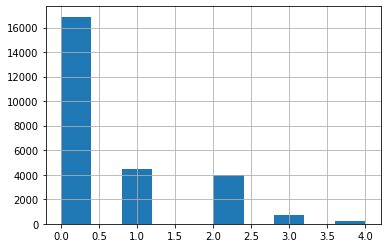

In [22]:
df_bugs["nb_bugs"].hist()
v = ['NON_MAJOR_BUG']
pd.DataFrame([bug for i, bug in df_bugs.iterrows() if bug['bugs'] == v])

In [ ]:
df.drop(columns=['Compile', 'Log-Build', 'Log-Compile', 'Log-Generate', 'Generate', 'JHipsterRegister', 'testFrameworks'], inplace=True)
df

In [ ]:
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded

In [ ]:
df.apply(LabelEncoder().fit_transform)["databaseType"].unique()

In [ ]:
df["databaseType"].unique()

In [ ]:
df

In [ ]:
X = df_encoded.drop(columns=["Build"])
y = df_encoded["Build"]

In [ ]:
test_size=0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

clf = RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

In [ ]:
test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

In [ ]:
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

In [ ]:
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

In [ ]:
clf

In [ ]:
plot_tree(clf, feature_names=X.columns) 

In [ ]:
from graphviz import Source
from IPython.display import SVG
graph = Source( export_graphviz(clf, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

In [ ]:
graph = Source( export_graphviz(clf, out_file=None, feature_names=X.columns))
graph.format = 'pdf'
graph.render('dtree_render', view=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/

importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [ ]:
df.query('databaseType == `"sql"`') # seems not working... prefer the old school solution: df[df["prodDatabaseType"] == '"mariadb"'] 

In [ ]:
df['prodDatabaseType'].unique()

In [ ]:
import random 

def rand_freq():
    r1 = random.randrange(0, 10, 1)
    r2 = random.randrange(0, 10, 1)
    return r1 == 0 and r2 == 0

x = [rand_freq() for i in range(0, 10000)]
unique, counts = np.unique(x, return_counts=True)

np.asarray((unique, counts)).T

In [ ]:
df2 = pd.read_csv('jhipster3.6.1-testresults.csv')

In [ ]:
# len(df2.query("Docker == True & authenticationType == 'uaa' & Build == 'KO'")) / NB_CONFIGURATIONS_JH

In [ ]:
df2.head()

In [ ]:
df2.query("Docker == True & authenticationType == 'uaa' & Build == 'KO'")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
vec = TfidfVectorizer(stop_words="english")
failures_vals = [v for v in df['Log-Build'].values if not v is np.nan]
vec.fit(failures_vals)
features = vec.transform(failures_vals)

In [ ]:
features

In [ ]:
cls = MiniBatchKMeans(n_clusters=5, random_state=0)
cls.fit(features)

In [ ]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

In [ ]:
import string
import collections
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
 
 
def process_text(text, stem=True):
    """ Tokenize text and stem words removing punctuation """
    # text = text.translate(None, string.punctuation)
    tokens = word_tokenize(text)
 
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
    return tokens 

 
def cluster_texts(texts, clusters=3):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(tokenizer=process_text,
                                 stop_words=stopwords.words('english'),
                                 max_df=0.5,
                                 min_df=0.1,
                                 lowercase=True)
 
    tfidf_model = vectorizer.fit_transform(texts)
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
 
    return clustering



clusters = cluster_texts(failures_vals, 10)

 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
pd.DataFrame(failures_vals[:1000])
# failures_vals[499]

In [ ]:
dclusters = dict(clusters)
found_clusters = pd.DataFrame(columns=['cluster_id', 'nbfailures', 'representative'])
for i in dclusters:
    found_clusters.loc[i] = (i, len(dclusters[i]), failures_vals[dclusters[i][0]])

In [ ]:
for c, cluster_failure in found_clusters.iterrows():
    print(cluster_failure['representative'])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(found_clusters)

In [ ]:
from IPython.core.display import HTML
pd.set_option('display.max_colwidth', -1)
display(HTML(found_clusters.to_html()))
